In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# The Gaussian distribution

The Gaussian distribution, also known as the normal distribution, is a probability distribution that describes the statistical behavior of a continuous random variable. 

It is defined by its mean $\mu$ and standard deviation $\sigma$ (or variance $\sigma^2$). 

The shape of the distribution is symmetric and bell-shaped, with the highest probability density at the mean.

The probability density function (PDF) of the Gaussian distribution is written as
\begin{eqnarray}
g(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( - \frac{(x - \mu)^2}{2\sigma^2} \right) \, .
\end{eqnarray}

### Define the Gaussian distribution

In [2]:
# Define the PDF of the Gaussian distribution
# The function must take 3 variables: x, mu, sigma

def g(x, mu, sigma):
    return 1 / ( sigma * np.sqrt( 2 * np.pi ) ) * np.exp( - 0.5 * ( x - mu ) ** 2 / sigma ** 2 )

### Study the Gaussian distribution for different parameters

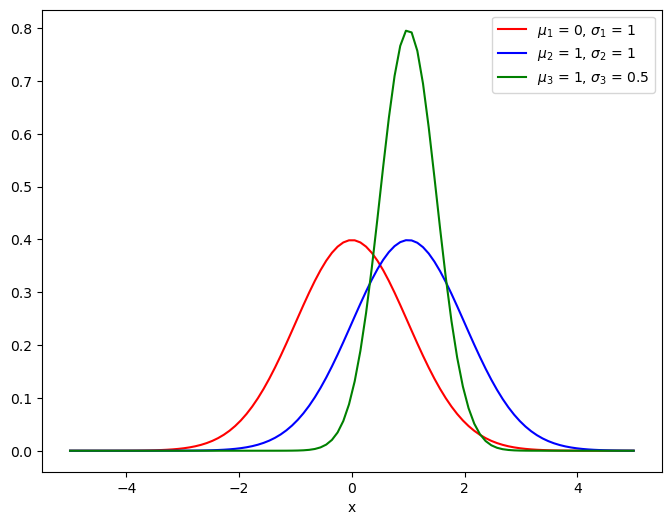

In [3]:
# Create an array of x values
xmin = -5
xmax =  5
N    = 100
x    = np.linspace(xmin, xmax, N)

# Generate three different Gaussian distributions (change the values of mu and sigma)
mu1     = 0
sigma1  = 1
y1      = g(x, mu1, sigma1)

mu2     = 1
sigma2  = 1
y2      = g(x, mu2, sigma2)

mu3     = 1
sigma3  = 0.5
y3      = g(x, mu3, sigma3)

plt.figure(figsize=(8, 6))
plt.plot( x, y1 , 'r', label = r"$\mu_1$ = " + str(mu1) + r", $\sigma_1$ = " + str(sigma1))
plt.plot( x, y2 , 'b', label = r"$\mu_2$ = " + str(mu2) + r", $\sigma_2$ = " + str(sigma2))
plt.plot( x, y3 , 'g', label = r"$\mu_3$ = " + str(mu3) + r", $\sigma_3$ = " + str(sigma3))
plt.xlabel("x")
plt.legend()


### Calculate probabilities

In [4]:
# This function is used to calculate integrals
from scipy.integrate import quad


# Calculate the probability between A and B

A = -0
B = +10

# The function quad is used to approximate integrals
# Input:  function, A, B, (parameters of the functions)
# Output: result, error
s1, err1 = quad(g, A, B, (mu1, sigma1))
s2, err2 = quad(g, A, B, (mu2, sigma2))
s3, err3 = quad(g, A, B, (mu3, sigma3))

print(s1)
print(s2)
print(s3)

0.49999999999999994
0.8413447460685428
0.9772498680518209


### Generate random real numbers distributed according to a Gaussian distribution

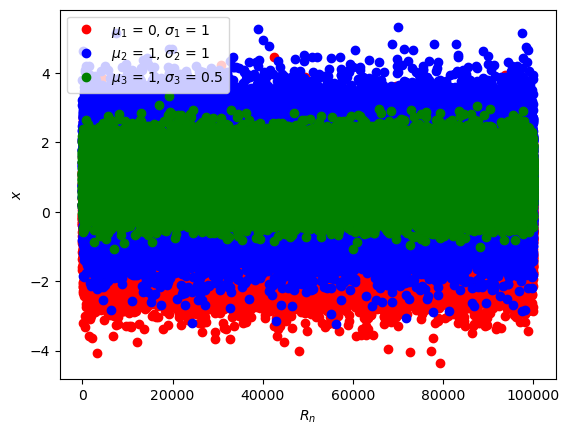

In [5]:
# Number of points to generate
N  = 100000
R1 = np.random.normal( mu1, sigma1, N )
R2 = np.random.normal( mu2, sigma2, N )
R3 = np.random.normal( mu3, sigma3, N )

# Plot the points 
plt.plot(R1, 'ro', label = r"$\mu_1$ = " + str(mu1) + r", $\sigma_1$ = " + str(sigma1))
plt.plot(R2, 'bo', label = r"$\mu_2$ = " + str(mu2) + r", $\sigma_2$ = " + str(sigma2))
plt.plot(R3, 'go', label = r"$\mu_3$ = " + str(mu3) + r", $\sigma_3$ = " + str(sigma3))
plt.xlabel(r"$R_n$")
plt.ylabel(r"$x$")
plt.legend();

### Build a histogram

1. Generate a new sequence of random points
2. Build the histogram of random points. Use the function np.histogram(R1, x)

In [6]:
mu    = 0
sigma = 1
N     = 100000
R     = np.random.normal( mu, sigma, N )

Nbins             = 50
counts, bin_edges = np.histogram(R1, x)

print(counts)
print(x)
# Note that x = bin_edges

[   0    0    0    0    0    0    1    0    0    4    1    0    2    4
    8    7   20   29   17   38   63   75  125  130  177  215  291  307
  426  532  647  782  910 1067 1295 1461 1640 1920 2235 2388 2696 2901
 3043 3396 3631 3761 3888 4035 4009 3942 4080 3878 3822 3764 3556 3339
 3082 2814 2605 2390 2220 2031 1705 1482 1353 1114  911  744  613  545
  378  333  248  232  167  137   69   66   53   43   33   29   13    6
    9    4    6    3    2    0    0    1    0    1    0    0    0    0
    0]
[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.959595

Plot the histogram with
plt.plot(x, counts)

Why do you get an error?
Check the length of the arrays with len(x) and len(counts)

99
100
99


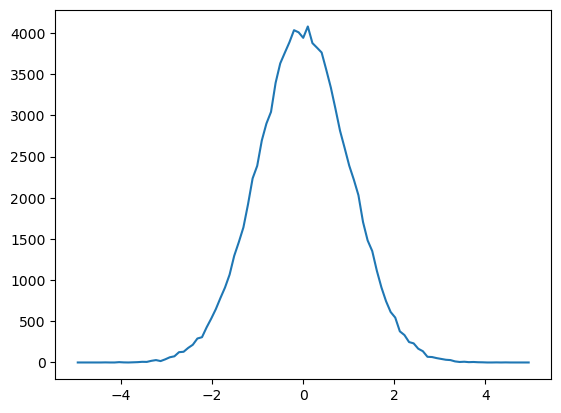

In [7]:
print(len(counts))
print(len(bin_edges))

db          = bin_edges[1] - bin_edges[0]
bin_centers = bin_edges + 0.5 * db
bin_centers = bin_centers[:-1]

print(len(bin_centers))

plt.plot(bin_centers, counts)

Plot the histogram with the Gaussian function $g(x,\mu,\sigma)$.
You need to normalize the histogram.

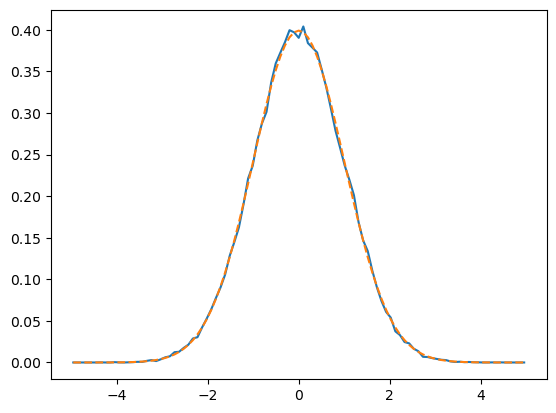

In [8]:
h = counts / np.sum( counts * db )

plt.plot(bin_centers, h)
plt.plot(bin_centers, g(bin_centers, mu, sigma), '--')

### Mean and standard deviation

$$
\mu = \frac{1}{N} \sum_{n=1}^N R_n
$$

$$
\sigma = \sqrt{\frac{1}{N} \sum_{n=1}^N (R_n - \mu)^2}
$$

1. Define two functions to calculate the mean and the standard deviation of a sequence of random numbers
2. Compare the results with the functions np.mean() and np.std()

In [ ]:
# Here define the two functions

def my_mean(R):


def my_std(R):

    

In [ ]:
# Here generate a new sequence of random numbers, 
# then calculate the mean and the std

mu    = 0
sigma = 1.5
N     = 100000
R     = np.random.normal( mu, sigma, N )